# Exercise 5
## Detection and Photometry of Galaxies

Detect and measure magnitudes of a large number of galaxies in an image.

STEPS

- Read and display fits image of the field

- Use the SExtractor package to detect and extract parameters from each detected galaxy in the field (see https://www.astromatic.net/software/sextractor)
  - To run SExtractor, you will need the following files:
    - default.sex (select input parameters)
    - default.conv
    - default.param (select output parameters)


- Read output from SExtractor (e.g., default.cat)

- Create a cutout around the central galaxy (400 pix by 400 pix) and show image with objects detected
  
- Plot a histogram of the magnitudes measured for galaxies in the field

## Import Modules

In [1]:
%matplotlib inline

# read fits image
from astropy.io import fits
import numpy as np

# cutout of fits image
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy.stats import *

import os
import os.path

#plot
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#patches
from matplotlib.patches import Rectangle, Circle

#read .png,.jpg,.gif image
import matplotlib.image as mpimg

#read and write tables
import pandas as pd

#image
magzero = 29.61  #Magnitude photometric zeropoint
pixscale = 0.56  #Plate scale (dx dy)   [arcsec per pixel]

#size of cutout images
size=400

#call sextractor
from subprocess import call
#call(['sex','fieldname.fits','-c','sig10.sex','-CATALOG_NAME','fieldname.cat'])



## Read and display field image

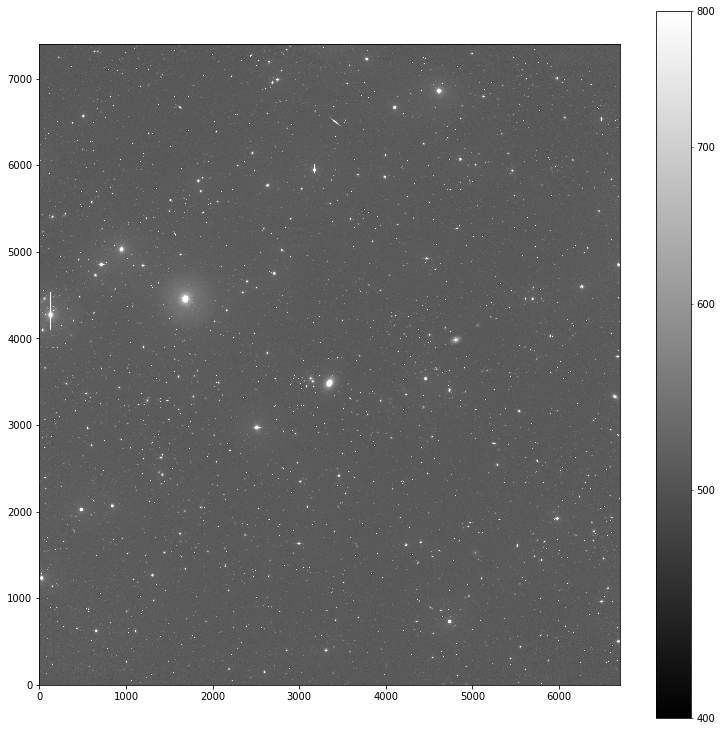

In [2]:
image_file = ("NGC4690.g.B3.fits")
image_data = fits.getdata(image_file, ext=0)
plt.figure(figsize=(13,13))
plt.imshow(image_data,origin='lower',norm = LogNorm(vmin =400, vmax = 800), cmap = "gray")
plt.colorbar();

## Run SExtractor

In [3]:
call(['./sex', 'NGC4690.g.B3.fits','-c','NGC4690.sex'])

0

## Read output from SExtractor / Remove possible stars

In [4]:
out=np.loadtxt("NGC4690.cat",skiprows=8)

In [5]:
#Remove all possible stars
mask = []
for i in out:
    if i[7]<0.5:
        mask += [True]
    else:
        mask += [False]
out = out[mask]

In [6]:
#Determine center of brightest galaxy
mag_min=999
xmin=0
ymin=0
for i in out:
    if i[1] <= mag_min:
        mag_min=i[1]
        xmin= i[3]
        ymin= i[4]
print(xmin, ymin)

3349.8752 3485.6287


## Create cutout around the central galaxy (500 pix by 500 pix) and show image with objects detected

In [7]:
image_file_2 = ("NGC4690.check.fits")
image_data_2 = fits.getdata(image_file_2, ext=0)
center=[np.array(xmin),np.array(ymin)]
size=500
cutout = Cutout2D(image_data_2, center, size)

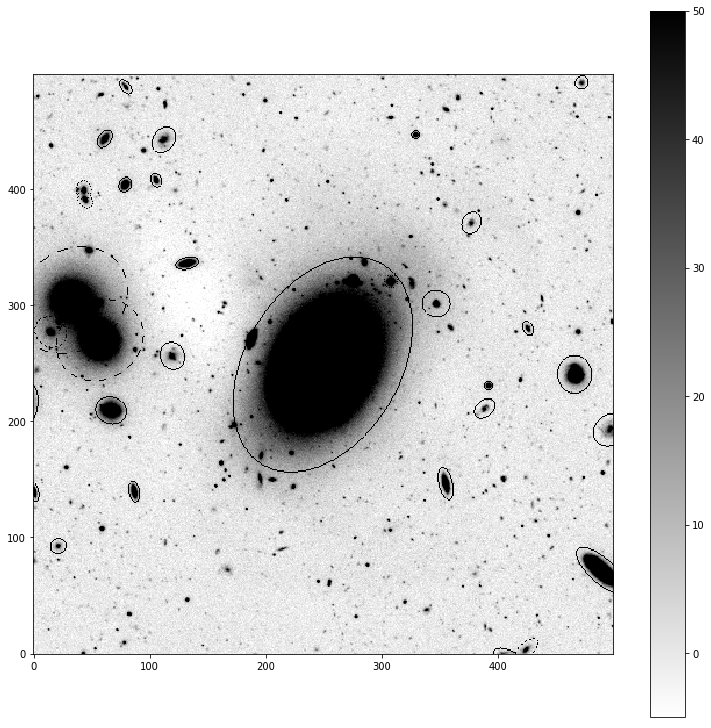

In [8]:
plt.figure(figsize=(13,13))
plt.imshow(cutout.data,origin='lower',vmin =-5, vmax = 50, cmap = "gist_yarg")
plt.colorbar();

## Plot histogram of magnitudes

In [9]:
mags = []
for i in out:
    mags += [i[1]]

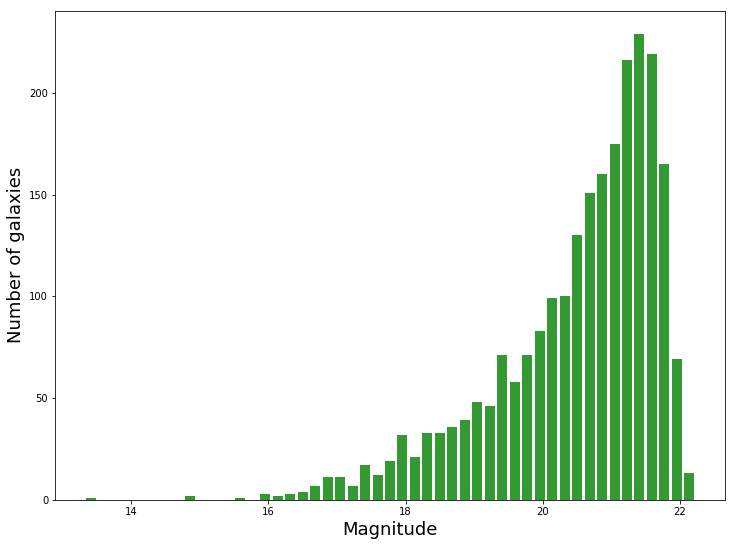

In [10]:
plt.figure(figsize=(12,9))
bins0 = np.linspace(min(mags),max(mags),50)
plt.hist(mags, bins0, histtype = "bar", alpha = 0.8, linewidth=1, color="green", rwidth=0.8)
plt.xlabel("Magnitude", fontsize=18)
plt.ylabel("Number of galaxies", fontsize=18)
plt.show;